<p>Pestaña posibles conflictos</p>

In [1]:
import pandas as pd

POSIBLES_CI = pd.read_excel('FORMULARIO.xlsx','POSIBLES_CI')

C:\Users\miser\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [2]:
Data1 = POSIBLES_CI[:]
Data1 = Data1[Data1['ESTADO_DEL_REPORTE'].isin(['FINALIZADO','EN REVISION'])]
Data1 = Data1[Data1['POSIBLE_CI'].isin(['SÍ'])]
Data1 = Data1[Data1['DESC_POSIBLE_CI'].notnull()]

In [3]:
import re
#import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer


def saltos_linea(x):
    cadena = x.rstrip()
    return cadena

def minuscula(x):
    minuscula = x.lower()
    return minuscula

def quitarotros(x):
    quitar = x.replace("ó","o").replace("á","a").replace("é","e").replace("í","i").replace("ú","u").replace("ü","u").replace("  "," ")
    quitar = re.sub("[^a-zA-Z ]","",quitar)
    return quitar

def stopword(x):
    stopword = set(stopwords.words('spanish2'))
    stop = [i for i in x.split() if i not in stopword]
    return " ".join(stop)
    #C:/Users/username/AppData/Roming/nltk_data/corpora/stopwords
    
def stemmer(x):
    texto = x.split()
    stemmer = SnowballStemmer('spanish')
    stemmed_text = [stemmer.stem(i) for i in texto]
    return " ".join(stemmed_text)
    

Data1['DESC_CORPUS'] = Data1['DESC_POSIBLE_CI'].apply(saltos_linea).apply(minuscula).apply(quitarotros)
Data1 = Data1[Data1['DESC_CORPUS'].str.contains("no tengo") == False]
Data1 = Data1[Data1['DESC_CORPUS'].str.contains("ningun") == False]
Data1['DESC_CORPUS'] = Data1['DESC_CORPUS'].apply(stopword).apply(stemmer)
Data1 = Data1[Data1['DESC_CORPUS'] != ""]

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=50,max_df=0.9,min_df=0.09,ngram_range=(1, 1))
tfidf_matriz = vectorizer.fit_transform(Data1['DESC_CORPUS'])
feature_nemes = vectorizer.get_feature_names()
tfidf = pd.DataFrame(tfidf_matriz.toarray(), columns=vectorizer.get_feature_names())

print(tfidf_matriz.shape)
print(feature_nemes)
print(tfidf.head(n=5))

(807, 5)
['activ', 'empres', 'part', 'sas', 'soci']
   activ    empres      part       sas      soci
0    0.0  0.000000  1.000000  0.000000  0.000000
1    1.0  0.000000  0.000000  0.000000  0.000000
2    0.0  0.000000  0.000000  0.000000  0.000000
3    0.0  0.447939  0.143961  0.761244  0.446244
4    0.0  0.000000  0.000000  0.000000  0.000000


C:\Users\miser\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


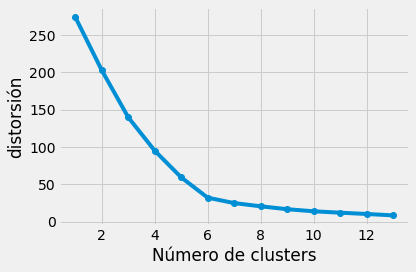

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distorsion = []
for i in range(1, 14):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(tfidf)
    distorsion.append(km.inertia_)
fig = plt.style.use("fivethirtyeight")
plt.plot(range(1, 14), distorsion, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('distorsión')
plt.tight_layout()
plt.show()

In [7]:
cluster = KMeans(n_clusters=6, init='k-means++',max_iter = 1500)
cluster.fit(tfidf)
Data1['CLUSTER'] = cluster.labels_
Data1.to_excel('clustering_posibles.xlsx', sheet_name='example')
centroide = cluster.cluster_centers_
centroide = pd.DataFrame(centroide)
centroide.to_excel('centroide_posibles.xlsx', sheet_name='example')
tfidf.to_excel('vector_posibles.xlsx', sheet_name='example')
print(Data1.groupby(['CLUSTER']).size())

CLUSTER
0    501
1     78
2     65
3     47
4     68
5     48
dtype: int64


Conyuge compañero

In [2]:
import pandas as pd

CONYUGE_COMPANERO = pd.read_excel('FORMULARIO.xlsx','CONYUGE_COMPANERO')

C:\Users\miser\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
Data2 = CONYUGE_COMPANERO[:]
Data2 = Data2[Data2['ESTADO_DEL_REPORTE'].isin(['FINALIZADO','EN REVISION'])]
Data2 = Data2[Data2['SUSCEPTIBLE_CI'].isin(['SÍ'])]
Data2 = Data2[Data2['TIENE_CONYUGE_CPERMANENTE'].isin(['SÍ'])]
Data2 = Data2[Data2['CCP_DESC_POTENCIAL_CI'].notnull()]

In [6]:
import re
#import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer


def saltos_linea(x):
    cadena = x.rstrip()
    return cadena

def minuscula(x):
    minuscula = x.lower()
    return minuscula

def quitarotros(x):
    quitar = x.replace("ó","o").replace("á","a").replace("é","e").replace("í","i").replace("ú","u").replace("ü","u").replace("  "," ")
    quitar = re.sub("[^a-zA-Z ]","",quitar)
    return quitar

def stopword(x):
    stopword = set(stopwords.words('spanish2'))
    stop = [i for i in x.split() if i not in stopword]
    return " ".join(stop)
    #C:/Users/username/AppData/Roming/nltk_data/corpora/stopwords
    
def stemmer(x):
    texto = x.split()
    stemmer = SnowballStemmer('spanish')
    stemmed_text = [stemmer.stem(i) for i in texto]
    return " ".join(stemmed_text)
    

Data2['DESC_CORPUS'] = Data2['CCP_DESC_POTENCIAL_CI'].apply(saltos_linea).apply(minuscula).apply(quitarotros)
Data2 = Data2[Data2['DESC_CORPUS'].str.contains("no tengo") == False]
Data2 = Data2[Data2['DESC_CORPUS'].str.contains("ningun") == False]
Data2['DESC_CORPUS'] = Data2['DESC_CORPUS'].apply(stopword).apply(stemmer)
Data2 = Data2[Data2['DESC_CORPUS'] != ""]

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=50,max_df=0.9,min_df=0.05,ngram_range=(1, 1))
tfidf_matriz = vectorizer.fit_transform(Data2['DESC_CORPUS'])
feature_nemes = vectorizer.get_feature_names()
tfidf2 = pd.DataFrame(tfidf_matriz.toarray(), columns=vectorizer.get_feature_names())

print(tfidf_matriz.shape)
print(feature_nemes)
print(tfidf.head(n=5))

(1203, 5)
['conflict', 'conyug', 'espos', 'grad', 'trabaj']
   conflict  conyug  espos  grad  trabaj
0       0.0     1.0    0.0   0.0     0.0
1       0.0     0.0    0.0   0.0     0.0
2       0.0     0.0    0.0   0.0     0.0
3       0.0     1.0    0.0   0.0     0.0
4       0.0     0.0    0.0   0.0     0.0


C:\Users\miser\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


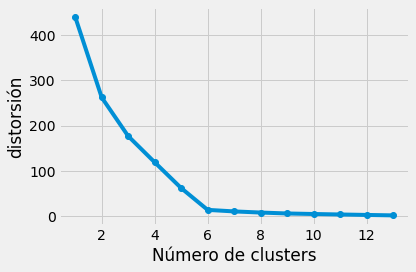

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distorsion = []
for i in range(1, 14):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(tfidf2)
    distorsion.append(km.inertia_)
fig = plt.style.use("fivethirtyeight")
plt.plot(range(1, 14), distorsion, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('distorsión')
plt.tight_layout()
plt.show()

In [39]:
cluster = KMeans(n_clusters=6, init='k-means++',max_iter = 1500)
cluster.fit(tfidf2)
Data2['CLUSTER'] = cluster.labels_
Data2.to_excel('clustering_companero.xlsx', sheet_name='example')
centroide = cluster.cluster_centers_
centroide = pd.DataFrame(centroide)
centroide.to_excel('centroide_companero.xlsx', sheet_name='example')
tfidf2.to_excel('vector_companero.xlsx', sheet_name='example')
print(Data2.groupby(['CLUSTER']).size())

CLUSTER
0     64
1    703
2     94
3    214
4     64
5     64
dtype: int64


<p>Parientes</p>

In [43]:
import pandas as pd

CI_PARIENTES = pd.read_excel('FORMULARIO.xlsx','CI_PARIENTES')

C:\Users\miser\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [45]:
Data3 = CI_PARIENTES[:]
Data3 = Data3[Data3['ESTADO_DEL_REPORTE'].isin(['FINALIZADO','EN REVISION'])]
Data3 = Data3[Data3['PARIENTE_DESC_POTENCIAL_CI'].notnull()]

In [47]:
import re
#import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer


def saltos_linea(x):
    cadena = x.rstrip()
    return cadena

def minuscula(x):
    minuscula = x.lower()
    return minuscula

def quitarotros(x):
    quitar = x.replace("ó","o").replace("á","a").replace("é","e").replace("í","i").replace("ú","u").replace("ü","u").replace("  "," ")
    quitar = re.sub("[^a-zA-Z ]","",quitar)
    return quitar

def stopword(x):
    stopword = set(stopwords.words('spanish2'))
    stop = [i for i in x.split() if i not in stopword]
    return " ".join(stop)
    #C:/Users/username/AppData/Roming/nltk_data/corpora/stopwords
    
def stemmer(x):
    texto = x.split()
    stemmer = SnowballStemmer('spanish')
    stemmed_text = [stemmer.stem(i) for i in texto]
    return " ".join(stemmed_text)
    

Data3['DESC_CORPUS'] = Data3['PARIENTE_DESC_POTENCIAL_CI'].apply(saltos_linea).apply(minuscula).apply(quitarotros)
Data3 = Data3[Data3['DESC_CORPUS'].str.contains("no tengo") == False]
Data3 = Data3[Data3['DESC_CORPUS'].str.contains("ningun") == False]
Data3['DESC_CORPUS'] = Data3['PARIENTE_DESC_POTENCIAL_CI'].apply(stopword).apply(stemmer)
Data3 = Data3[Data3['DESC_CORPUS'] != ""]

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=50,max_df=0.9,min_df=0.05,ngram_range=(1, 1))
tfidf_matriz = vectorizer.fit_transform(Data3['DESC_CORPUS'])
feature_nemes = vectorizer.get_feature_names()
tfidf2 = pd.DataFrame(tfidf_matriz.toarray(), columns=vectorizer.get_feature_names())

print(tfidf_matriz.shape)
print(feature_nemes)
print(tfidf.head(n=5))

(7665, 10)
['conflict', 'consanguin', 'de', 'grad', 'hij', 'madr', 'mi', 'no', 'padr', 'prim']
   conflict  conyug  espos  grad  trabaj
0       0.0     1.0    0.0   0.0     0.0
1       0.0     0.0    0.0   0.0     0.0
2       0.0     0.0    0.0   0.0     0.0
3       0.0     1.0    0.0   0.0     0.0
4       0.0     0.0    0.0   0.0     0.0
